# Felipe Steudel - CA1 - Machine Learning for Business
### INTRODUÇÃO
A avaliação de dados educacionais é crucial para a criação de políticas públicas, o planejamento de investimentos e a promoção de uma sociedade mais justa. Em um cenário europeu, onde as desigualdades entre regiões e grupos sociais persistem, entender os níveis de educação pode fornecer dados valiosos para tomadas de decisões estratégicas.
### MOTIVAÇÃO PARA O PROJETO
A motivação para este projeto vem da necessidade de investigar as diferenças no nível educacional entre países, idades e gêneros na Europa. Com essa avaliação, busca-se reconhecer padrões, agrupamentos e potenciais disparidades que possam orientar futuras pesquisas ou iniciativas de aprimoramento por parte de instituições de ensino e governos.
### DESCRIÇÃO DO PROBLEMA
O conjunto de dados empregado inclui dados sobre o grau de instrução da população europeia, divididos por idade, gênero e localização geográfica. Education attainment is given by International Standard Classification of Education (ISCED11).  
ISCED11 education levels are the following:  
X - No schooling  
0 - Early childhood education  
1 - Primary education  
2 - Lower secondary education  
3 - Upper secondary education  
4 - Post-secondary non-tertiary education  
5 - Short-cycle tertiary education  
6 - Bachelor’s or equivalent level  
7 - Master’s or equivalent level  
8 - Doctoral or equivalent level  
9 - Not elsewhere classified  

Devido à vasta quantidade e variedade dos dados, é um desafio identificar padrões pertinentes sem o uso de métodos adequados de análise e agrupamento. Portanto, o projeto visa utilizar algoritmos de aprendizado de máquina (especialmente de clusterização) para identificar agrupamentos naturais nos dados que possuam características semelhantes.
### OBJETIVOS DO PROJETO
Os objetivos centrais deste projeto é responder a seguinte pergunta:  

#### Como agrupar países europeus com base em padrões de nível educacional ao longo dos anos?  

Ela deverá ser respondida seguindo alguns passos:  
•	Executar uma análise exploratório na base de dados de educação europeia;  
•	Utilizar métodos de agrupamento para agrupar observações com atributos parecidos;  
•	Analisar o rendimento de variados algoritmos de agrupamento;  
•	Analisar os agrupamentos identificados para obter percepções pertinentes sobre o perfil educacional dos europeus.  
### JUSTIFICATIVA PARA O CONJUNTO DE DADOS ESCOLHIDO
As informações foram obtidas do site oficial da União Europeia, Eurostat, e registradas na plataforma Kaggle. Ele proporciona uma fundamentação sólida e segura sobre o grau de instrução da população, sendo perfeito para usos em aprendizagem não supervisionada. A sua segmentação por idade, gênero e localização faz com que o conjunto seja particularmente eficaz para detectar padrões educacionais ocultos que não seriam facilmente identificados por análises tradicionais.

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

## Análise Exploratória de Dados (EDA)

### Carregamento dos Dados

In [2]:
df = pd.read_csv("population_by_education_level.csv")

In [3]:
df

,unit,sex,age,isced11,geography,date,value
0,THS,F,Y15-19,ED0-2,AT,2020,149.8
1,THS,F,Y15-19,ED0-2,BE,2020,247.9
2,THS,F,Y15-19,ED0-2,BG,2020,128.4
3,THS,F,Y15-19,ED0-2,CH,2020,168.2
4,THS,F,Y15-19,ED0-2,CY,2020,16.8
...,...,...,...,...,...,...,...
609971,THS,T,Y65-69,TOTAL,SE,1983,NaN
609972,THS,T,Y65-69,TOTAL,SI,1983,NaN
609973,THS,T,Y65-69,TOTAL,SK,1983,NaN
609974,THS,T,Y65-69,TOTAL,TR,1983,NaN


### Informações Básicas

In [4]:
df.shape

(609976, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609976 entries, 0 to 609975
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   unit       609976 non-null  object 
 1   sex        609976 non-null  object 
 2   age        609976 non-null  object 
 3   isced11    609976 non-null  object 
 4   geography  609976 non-null  object 
 5   date       609976 non-null  int64  
 6   value      361370 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 32.6+ MB


In [6]:
df.describe()

,date,value
count,609976.000000,361370.000000
mean,2001.500000,4437.056919
std,10.965865,16716.155159
min,1983.000000,0.400000
25%,1992.000000,84.500000
50%,2001.500000,400.050000
75%,2011.000000,1947.575000
max,2020.000000,380593.300000


In [7]:
df.duplicated().sum()

0

Existem muitos dados "T" na variavel sexo, que representa a soma dos dados de ambos os sexos (M + F). Essa é a explicação mais comum em bases do Eurostat.

In [8]:
df['sex'].value_counts()

sex
T    203680
M    203376
F    202920
Name: count, dtype: int64

Existem valores "TOTAL" na variavel isced11, representando a soma dos dados total das faixas de Educacionais segunda a International Standard Classification of Education (ISCED11)
Os valores "NRP" representam "No Response Provided", Isso indica que, para aquele registro, não houve uma resposta válida sobre o nível educacional. Pode ser um dado faltante.

In [9]:
df['isced11'].value_counts()

isced11
ED0-2    128934
ED3_4    128934
TOTAL    128934
ED5-8    128402
NRP       94772
Name: count, dtype: int64

In [10]:
df['age'].value_counts()

age
Y15-39    21356
Y15-59    21356
Y15-64    21356
Y15-74    21356
Y15-24    21356
Y20-64    21166
Y25-74    21090
Y25-49    21090
Y25-64    21090
Y25-59    21090
Y25-54    21090
Y25-39    21090
Y25-29    21052
Y20-24    21014
Y35-39    21014
Y50-74    20976
Y40-44    20976
Y40-59    20976
Y40-64    20976
Y45-49    20976
Y50-59    20938
Y50-64    20938
Y65-69    20938
Y50-54    20938
Y30-34    20862
Y55-64    20824
Y60-64    20786
Y55-59    20748
Y15-19    20558
Name: count, dtype: int64

Existem valores 'EU15', 'EA19', 'EU27_2020', 'EU28' que representam dados agregados de paises dentro União Europeia ou da Zona do Euro

In [11]:
df['geography'].value_counts()

geography
IE           16530
EU28         16530
SI           16530
SE           16530
PT           16530
NO           16530
NL           16530
LU           16530
IT           16530
IS           16530
BE           16530
HU           16530
FR           16530
FI           16530
UK           16530
EU27_2020    16530
EU15         16530
CH           16530
ES           16530
EL           16530
CZ           16530
EA19         16530
DE           16530
DK           16530
LV           16492
AT           16340
EE           16112
HR           15960
MT           14896
LT           13908
TR           13680
RO           13642
MK           13224
CY           13224
BG           13224
SK           13224
ME           13110
PL           13110
RS           13110
Name: count, dtype: int64

In [12]:
df['date'].value_counts()

date
2020    16052
1992    16052
1999    16052
1998    16052
1997    16052
1996    16052
1995    16052
1994    16052
1993    16052
1991    16052
2019    16052
1990    16052
1989    16052
1988    16052
1987    16052
1986    16052
1985    16052
1984    16052
2000    16052
2001    16052
2002    16052
2003    16052
2018    16052
2017    16052
2016    16052
2015    16052
2014    16052
2013    16052
2012    16052
2011    16052
2010    16052
2009    16052
2008    16052
2007    16052
2006    16052
2005    16052
2004    16052
1983    16052
Name: count, dtype: int64

### Visualização de Distribuições

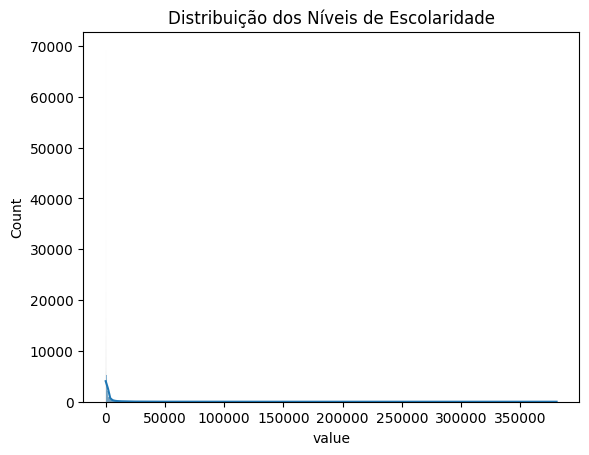

In [13]:
# Histograma do nível educacional (se for numérico ou percentual)
sns.histplot(df['value'], kde=True)
plt.title('Distribuição dos Níveis de Escolaridade')
plt.show()

<Axes: xlabel='sex', ylabel='value'>

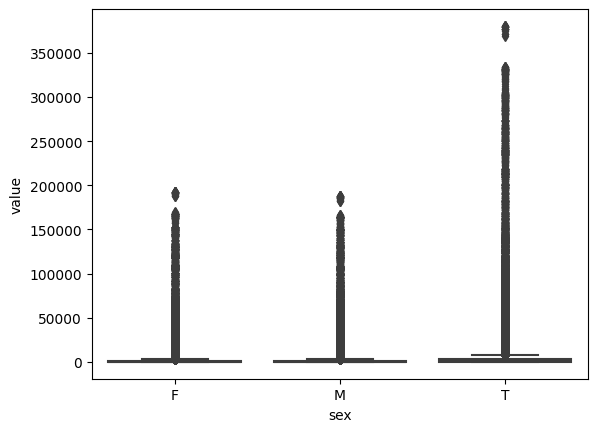

In [14]:
# Boxplot por sexo
sns.boxplot(data=df, x='sex', y='value')

In [15]:
# Distribuição Geográfica

# Dicionário de mapeamento de siglas para nomes completos (você pode ajustar conforme necessário)
country_mapping = {
    'AT': 'Austria', 
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CY': 'Cyprus',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'EE': 'Estonia',
    'EL': 'Greece',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'HR': 'Croatia',
    'HU': 'Hungary',
    'IE': 'Ireland',
    'IT': 'Italy',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'LV': 'Latvia',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SE': 'Sweden',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'CH': 'Switzerland',
    'IS': 'Iceland', 
    'ME': 'Montenegro', 
    'MK': 'North Macedonia', 
    'NO': 'Norway', 
    'RS': 'Serbia', 
    'TR': 'Turkey',
    'UK': 'United Kingdom'
}

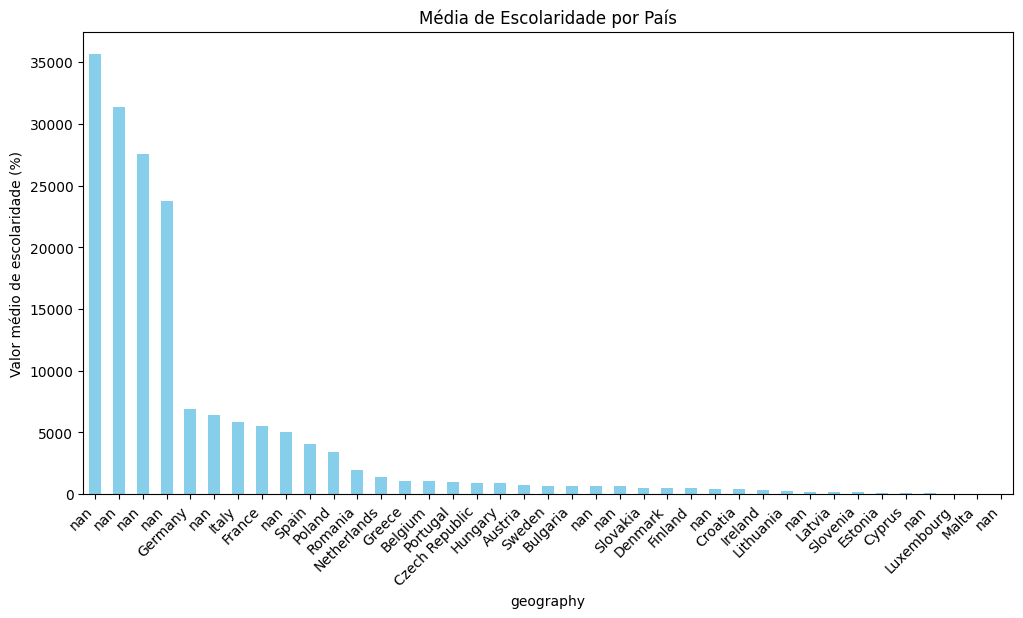

In [16]:
# Calcular a média de escolaridade por país
df_geo = df.groupby('geography')['value'].mean().sort_values(ascending=False)

# Substituir siglas por nomes completos dos países
df_geo.index = df_geo.index.map(country_mapping)

# Plotar o gráfico de barras
df_geo.plot(kind='bar', figsize=(12,6), color='skyblue', title='Média de Escolaridade por País')
plt.ylabel('Valor médio de escolaridade (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Análise de Valores Faltantes (NaN)

In [17]:
df.isnull().sum()

unit              0
sex               0
age               0
isced11           0
geography         0
date              0
value        248606
dtype: int64

### Dados "T" de sexo são apagados

In [18]:
df = df[df['sex'] != 'T']
print(df['sex'].unique())

['F' 'M']


### Dados "TOTAL" de isced11 são apagados

In [19]:
df = df[df['isced11'] != 'TOTAL']
print(df['isced11'].unique())

['ED0-2' 'ED3_4' 'ED5-8' 'NRP']


### Os valores agregados da União Européia e zona do Euro são apagados

In [20]:
df = df[~df['geography'].isin(['EU15', 'EA19', 'EU27_2020', 'EU28'])]
print(df['geography'].unique())

['AT' 'BE' 'BG' 'CH' 'CY' 'CZ' 'DE' 'DK' 'EE' 'EL' 'ES' 'FI' 'FR' 'HR'
 'HU' 'IE' 'IS' 'IT' 'LT' 'LU' 'LV' 'ME' 'MK' 'MT' 'NL' 'NO' 'PL' 'PT'
 'RO' 'RS' 'SE' 'SI' 'SK' 'TR' 'UK']


### Apaga todos os registros NaN de Value

In [21]:
df = df.dropna(subset=['value'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160846 entries, 0 to 604576
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   unit       160846 non-null  object 
 1   sex        160846 non-null  object 
 2   age        160846 non-null  object 
 3   isced11    160846 non-null  object 
 4   geography  160846 non-null  object 
 5   date       160846 non-null  int64  
 6   value      160846 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 9.8+ MB


## EDA de Série Temporal
Para permitir entender o comportamento dos dados ao longo do tempo, encontrar dados faltantes, valores extremos ou padrões sazonais importante.

### Média/mediana de nível educacional por ano

In [32]:
mean_per_year = df.groupby('date')['value'].mean()
median_per_year = df.groupby('date')['value'].median()

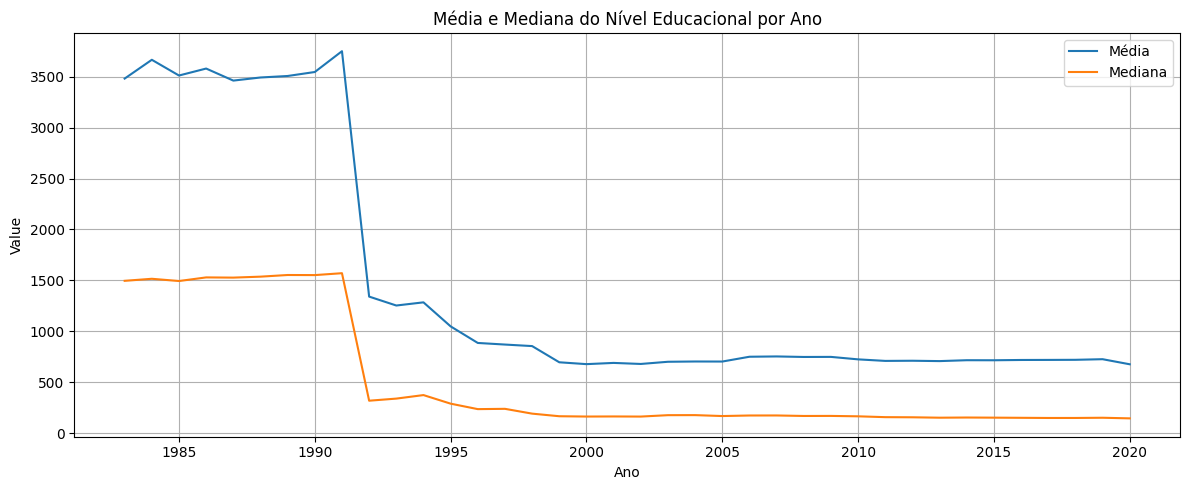

In [33]:
plt.figure(figsize=(12, 5))
mean_per_year.plot(label='Média')
median_per_year.plot(label='Mediana')
plt.title("Média e Mediana do Nível Educacional por Ano")
plt.xlabel("Ano")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


### Evolução temporal por país

In [41]:
# Mapeando os nomes dos países
df['geo_full'] = df['geography'].map(country_mapping)

# Selecionar os 5 países com mais registros
top_countries = df['geo_full'].value_counts().head(5).index
df_top = df[df['geo_full'].isin(top_countries)]

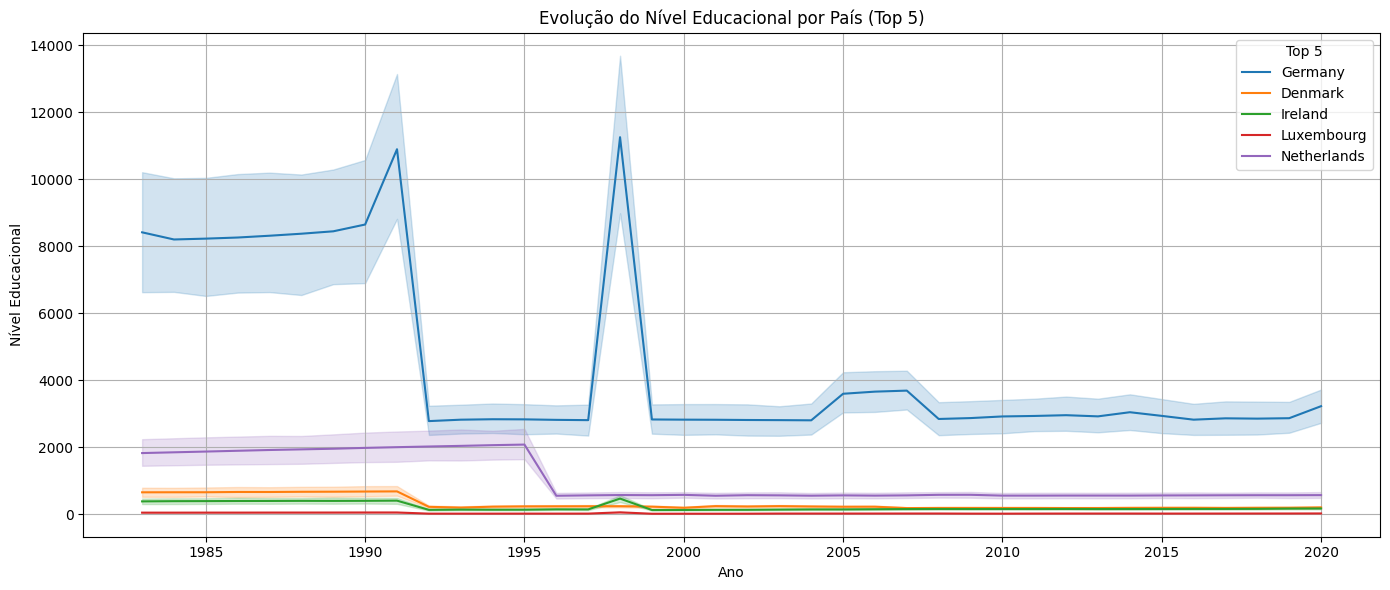

In [46]:
# Plot
plt.figure(figsize=(14, 6))
plot = sns.lineplot(data=df_top, x='date', y='value', hue='geo_full')
plt.title("Evolução do Nível Educacional por País (Top 5)")
plt.ylabel("Nível Educacional")
plt.xlabel("Ano")
plt.grid(True)

# Alterar o título da legenda
plot.legend_.set_title("Top 5")

plt.tight_layout()
plt.show()

### Evolução temporal por faixa etária

In [50]:
# Top 5 faixas etárias com mais registros
top_ages = df['age'].value_counts().head(5).index
df_top_age = df[df['age'].isin(top_ages)]

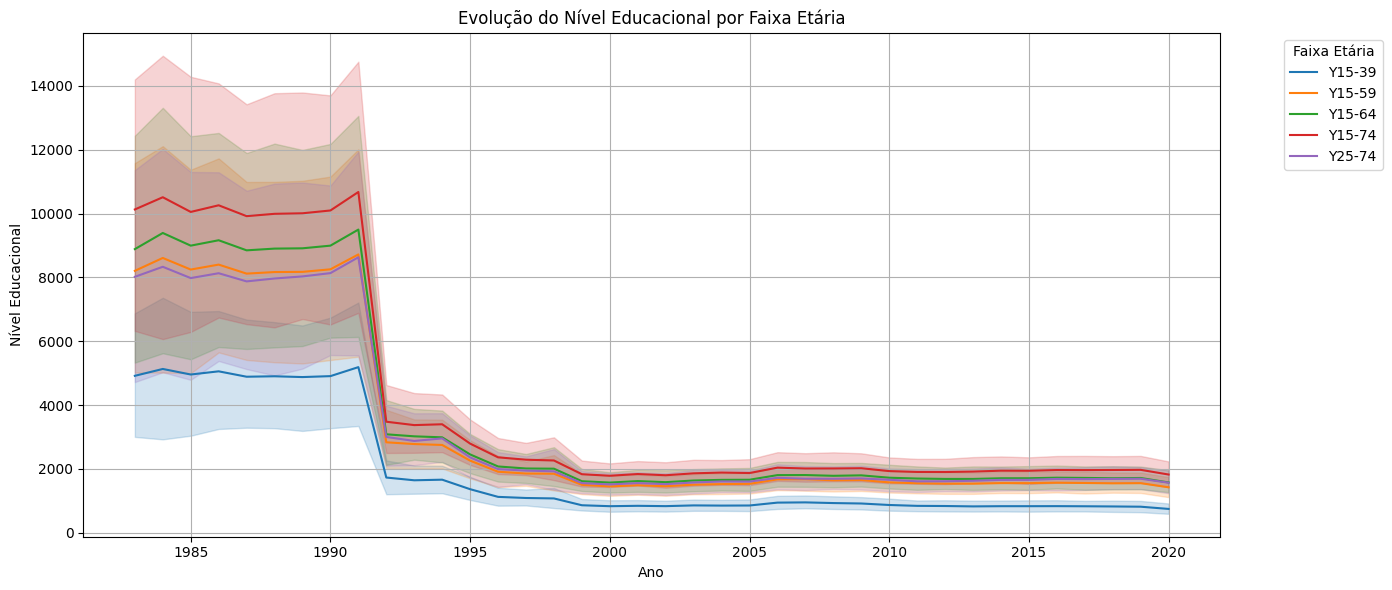

In [51]:
# Plot
plt.figure(figsize=(14, 6))
plot = sns.lineplot(data=df_top_age, x='date', y='value', hue='age')
plt.title("Evolução do Nível Educacional por Faixa Etária")
plt.ylabel("Nível Educacional")
plt.xlabel("Ano")
plt.grid(True)

# Legenda fora do gráfico
plt.legend(title="Faixa Etária", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Heatmap (Ano x País)

In [68]:
# Aplicar o mapeamento dos nomes dos países
df['geo_full'] = df['geography'].map(country_mapping)

# Criar tabela dinâmica com nomes dos países
heatmap_data = df.pivot_table(index='date', columns='geo_full', values='value', aggfunc='mean')

# Ajustar o índice da heatmap_data para exibir apenas o ano
heatmap_data.index = heatmap_data.index.year

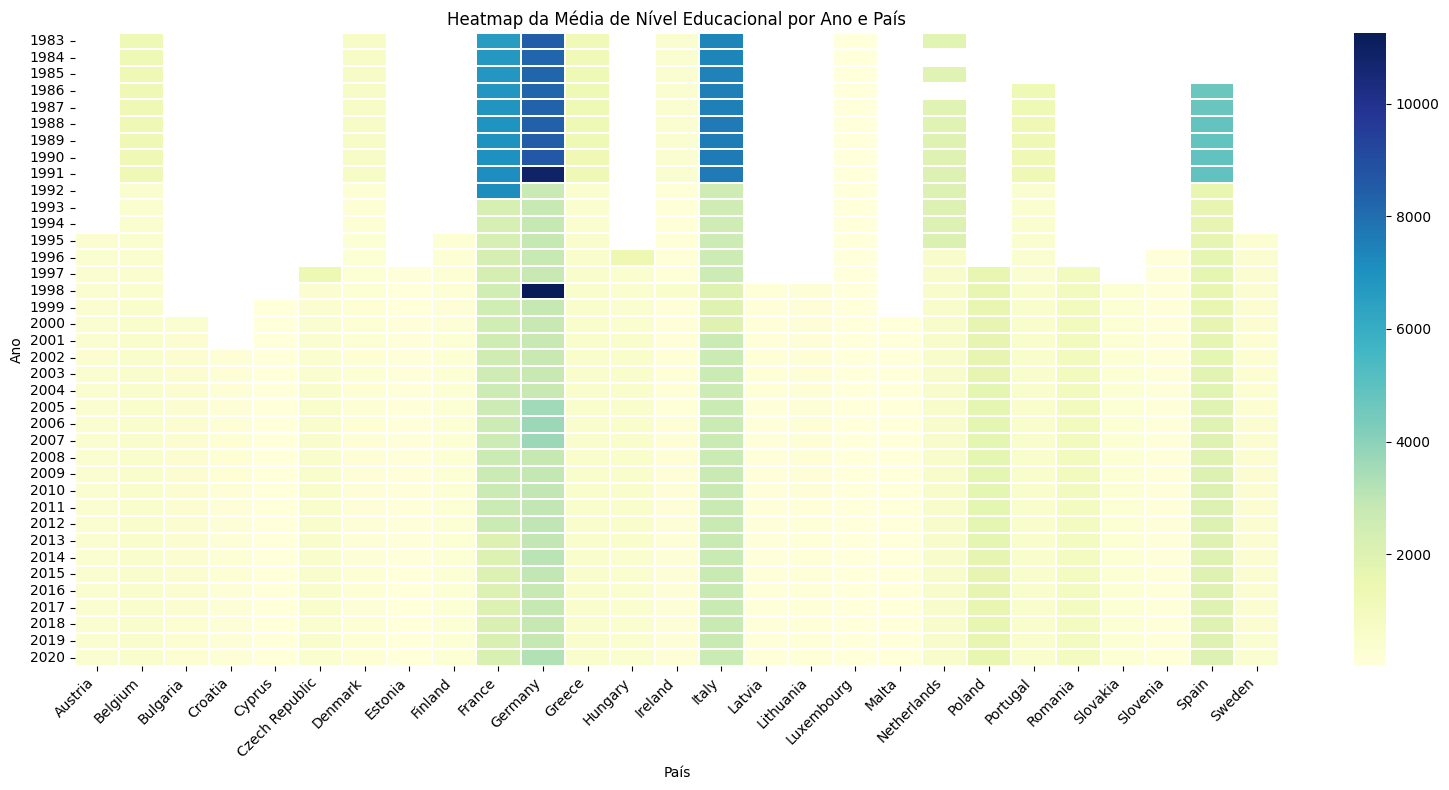

In [69]:
# Plot
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", linecolor='white', linewidths=0.1)
plt.title("Heatmap da Média de Nível Educacional por Ano e País")
plt.xlabel("País")
plt.ylabel("Ano")

# Inclinar os nomes dos países no eixo X
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Rolling Mean (Média móvel)

In [58]:
df_rolling = df.groupby('date')['value'].mean().rolling(window=5).mean()

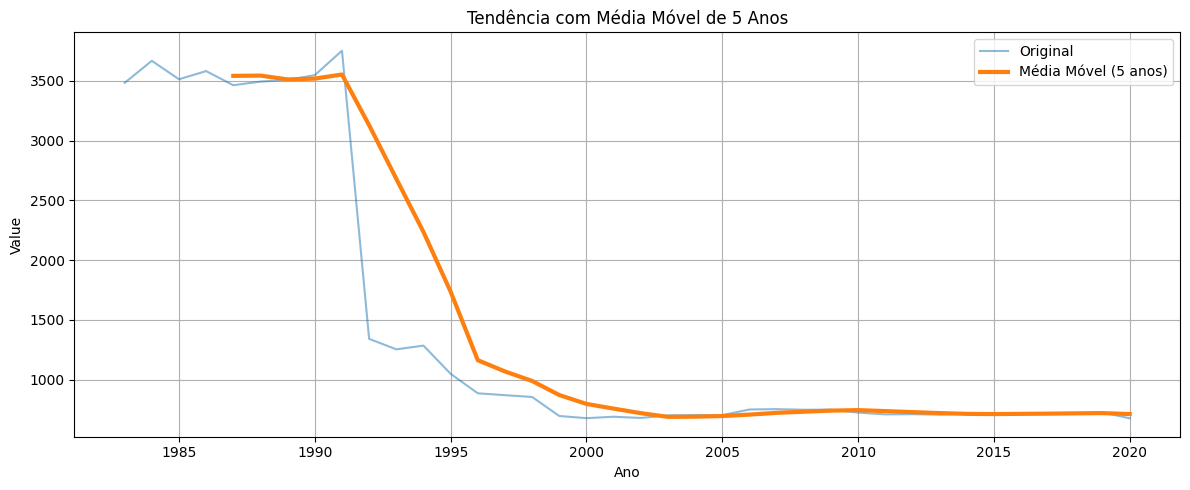

In [59]:
plt.figure(figsize=(12, 5))
df.groupby('date')['value'].mean().plot(label='Original', alpha=0.5)
df_rolling.plot(label='Média Móvel (5 anos)', linewidth=3)
plt.title("Tendência com Média Móvel de 5 Anos")
plt.xlabel("Ano")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Decomposição

In [64]:
# Converter 'date' para tipo datetime
df['date'] = pd.to_datetime(df['date'], format='%Y')

# Agora, agrupe por 'date' e calcule a média
ts = df.groupby('date')['value'].mean()

# Resample para dados anuais (caso necessário)
ts_resampled = ts.resample('Y').mean()

decomposition = seasonal_decompose(ts_resampled, model='additive')

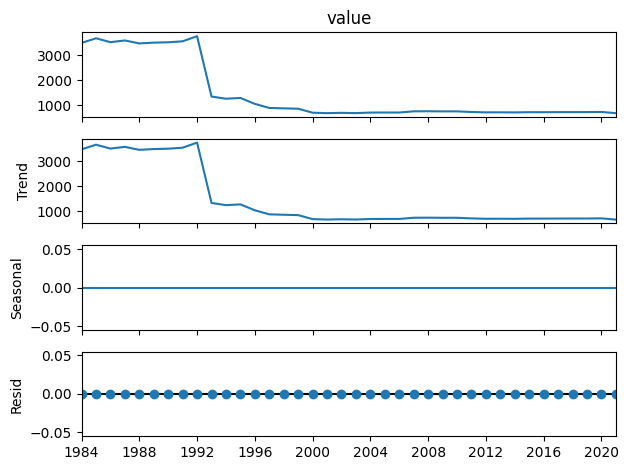

In [65]:
# Plotar os resultados da decomposição
decomposition.plot()
plt.show()

## Clusterização
Antes de aplicar os algoritmos, é essencial padronizar os dados. São selecionadas as colunas value e date do DataFrame.

In [23]:
# Seleciona as colunas 'value' e 'date'
X = df[['value', 'date']]

# Padroniza os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### K-Means

In [24]:
# Aplica o K-Means com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calcula as métricas de desempenho dos clusters
silhouette_kmeans = silhouette_score(X_scaled, kmeans_labels)
davies_kmeans = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"K-Means - Silhouette Score: {silhouette_kmeans:.3f}")
print(f"K-Means - Davies-Bouldin Index: {davies_kmeans:.3f}")

K-Means - Silhouette Score: 0.532
K-Means - Davies-Bouldin Index: 0.688


#### Gráfico de Dispersão

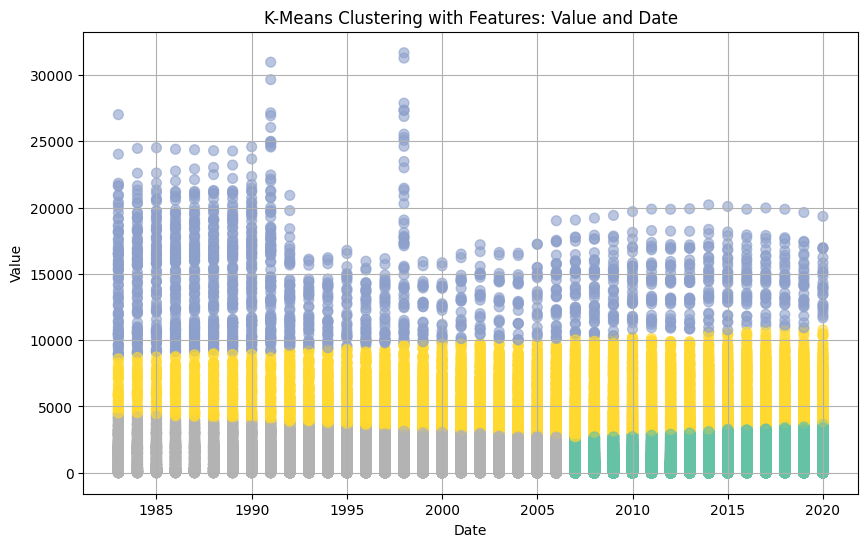

In [25]:
# Visualiza os resultados em um gráfico de dispersão usando as variáveis originais
plt.figure(figsize=(10, 6))
plt.scatter(df['date'], df['value'], c=kmeans_labels, cmap='Set2', s=50, alpha=0.6)
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("K-Means Clustering with Features: Value and Date")
plt.grid(True)
plt.show()

### Hierarchical Clustering (Agglomerative Clustering)

#### Redução dos Dados
A redução dos dados para 10.000 amostras é necessário para diminuir o consumo de memoria RAM.

In [26]:
# Reduzir para, por exemplo, 10.000 amostras
X_sample = resample(X_scaled, n_samples=10000, random_state=42)

In [27]:
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglo_labels = agglo.fit_predict(X_sample)

silhouette_agglo = silhouette_score(X_sample, agglo_labels)
davies_agglo = davies_bouldin_score(X_sample, agglo_labels)

print(f"Agglomerative - Silhouette Score: {silhouette_agglo:.3f}")
print(f"Agglomerative - Davies-Bouldin Index: {davies_agglo:.3f}")

Agglomerative - Silhouette Score: 0.509
Agglomerative - Davies-Bouldin Index: 0.727


In [28]:
# PCA para reduzir (ou projetar) para 2 dimensões
pca = PCA(n_components=2)
X_pca_sample = pca.fit_transform(X_sample)

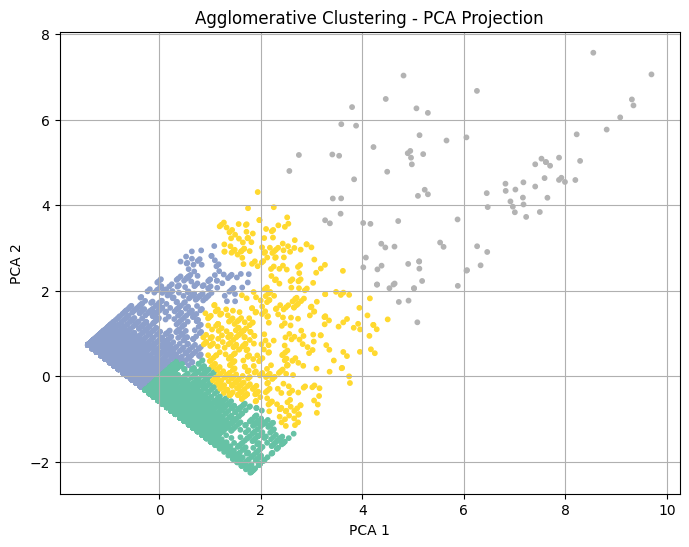

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=agglo_labels, cmap='Set2', s=10)
plt.title("Agglomerative Clustering - PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

##### Dendrograma

Por causa da complexidade do gráfico e para permitir uma visualização legível, será utilizado uma amostra menor para o Dendograma.

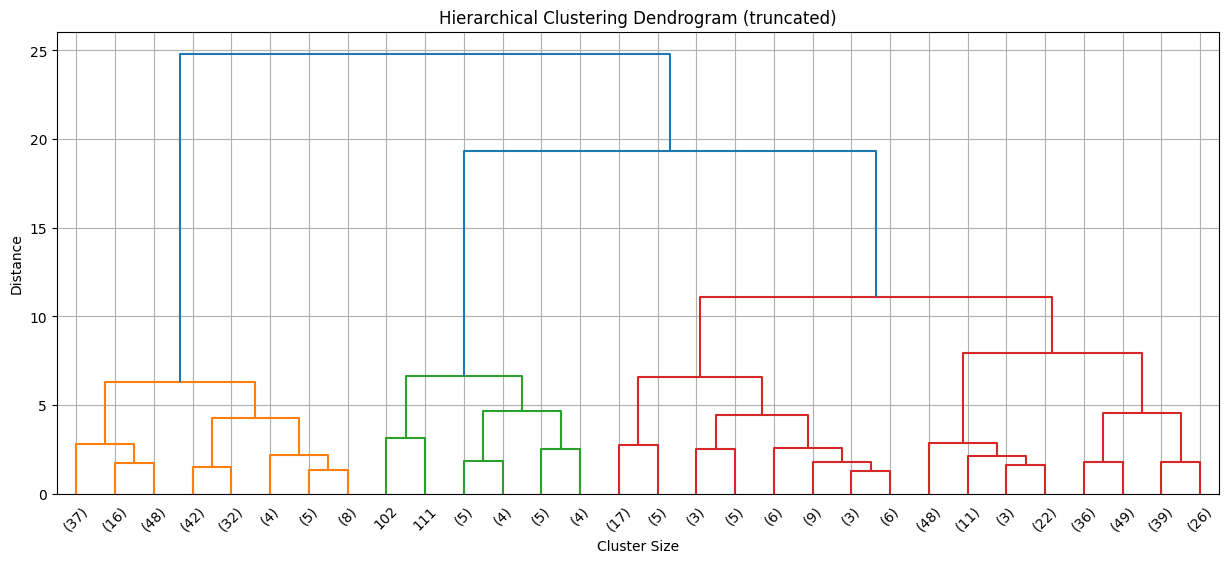

In [30]:
# Amostra menor para o dendrograma
X_dendro = resample(X_scaled, n_samples=500, random_state=42)

linked = linkage(X_dendro, method='ward')

plt.figure(figsize=(15, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=45., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")
plt.grid(True)
plt.show()